# Optical laser calibration

This log is part of the experiment 20139026 at beamline DiProi at Fermi/Trieste (Oct.2017)

Here we calibrate the optical laser intesnity, by comparing the flux at 800nm and 400nm

### Import and define stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [8]:
def power_law(x,a,b,c):
    return a*x**b

def fit(function,x,y,p0=None,sigma=None,bounds=None):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    x = np.arange(0,1e4)
    curve = function(x,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,x,curve,perr

### Fitting the laser intensity 400 vs 800 nm

2017/10/25 15:59

In [9]:
x = np.array([134,  230,  340, 440, 530, 600, 620]) #intensity of 800 nm (uJ)
y = np.array([10.7, 27.2, 51,  76,  100, 114, 120]) #intensity of 400 nm (uJ)

In [10]:
popt,xf,f,perr = fit(power_law,x,y)
print popt

[ 0.01094616  1.44865197  1.        ]


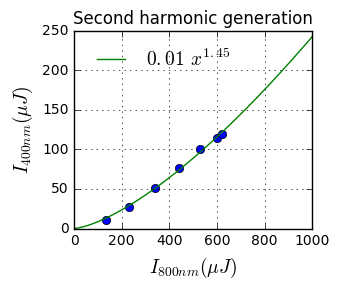

In [11]:
plt.figure(figsize=[3.5,3])
plt.plot(x,y,'o')
plt.plot(xf,f,label = r'$%.2f$ $x^{%.2f}$'%(popt[0],popt[1]))
plt.xlim(0,1000)
plt.ylim(0,250)
plt.xlabel(r'$I_{800 nm} (\mu J) $',size=14)
plt.ylabel(r'$I_{400 nm} (\mu J) $',size=14)
plt.title('Second harmonic generation')
plt.legend(frameon=False,loc='upper left', prop={'size': 14})
plt.grid()
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)

plt.show()

In [12]:
print f[xf==714]

[ 149.03124471]


In [13]:
y400 = np.arange(260,1000,20)
x800 = (y400/popt[0])**(1/popt[1])
print y400
print x800

[260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600
 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960
 980]
[ 1048.43191092  1103.4615861   1157.28610833  1210.00978344  1261.72197549
  1312.49999617  1362.41130642  1411.51522168  1459.86425163  1507.5051666
  1554.47985605  1600.82602713  1646.57777838  1691.76607499  1736.41914573
  1780.5628167   1824.22079405  1867.41490481  1910.16530328  1952.49064885
  1994.40825997  2035.93424807  2077.08363463  2117.87045379  2158.30784283
  2198.40812206  2238.18286574  2277.64296517  2316.79868499  2355.6597136
  2394.23520843  2432.53383665  2470.56381195  2508.33292781  2545.84858758
  2583.11783193  2620.14736377]
